## FPUT (simple case)

Consider the hamiltonian below
\begin{equation}
H(\vec{q},\vec{p})=\sum_{n=0}^{N-1}\Bigr[ \frac{p_n^2}{2}+k\frac{(q_{n+1}-q_n)^2}{2}\Bigr]\\
\vec{q} = [q_1, \dots, q_n,\dots, q_N]\\
\vec{p} = [p_1, \dots, p_n, \dots,p_N]\\
\end{equation}

With the initial condition of the following form:\
\begin{equation}
q_n(0)=Asin(\frac{\pi n}{N})\\p_n(0)=0
\end{equation}

<!-- The dependence between $q_n$ and $p_n$ are from the hamiltonian $H_n$ is
\begin{equation}
p_n = \sqrt{2E_n-k(q_{n+1}-q_n)^2}, \\
E_n=H_n, H = \sum_{n=0}^{N-1}H_n
\end{equation} -->

then, $\dot{q_n}$ and $\dot{p_n}$ would be

\begin{equation}
\dot{q_n}=\frac{\partial H}{\partial p_n}=p_n
\\
\dot{p_n}=-\frac{\partial H}{\partial q_n}=k(q_{n-1}+q_{n+1}-2q_n)
\end{equation}



In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Initializing position/ momentum grid/ spring constant
## Assumes that len(p)=len(q)>=3


M = 8 # total number of oscillators
k = 0.3 # spring constant
A = 0.5 # amplitude
q = A*np.sin(np.linspace(0,np.pi,M)) # oscillators' corresponding position
p = np.zeros(M)

# Initializing p_dot and q_dot at time t=0
q_dot = p
p_dot_0 = np.zeros(M)

def p_dot_update(p_dot, q):
    for i in range(M):
        if i==0:
            p_dot[i]=k*(q[i+1]-2*q[i])
        elif i==len(q)-1:
            p_dot[i]=k*(q[i-1]-2*q[i])
        else:
            p_dot[i]=k*(-2*q[i]+q[i-1]+q[i+1])
    return p_dot

# p_dot = p_dot_update(p_dot_0,q)

# plt.plot(p,'g',label='momentum at t=0')
# plt.plot(p_dot,'r',label='momentum derivative at t=0')
# plt.legend()


<Figure size 640x480 with 0 Axes>

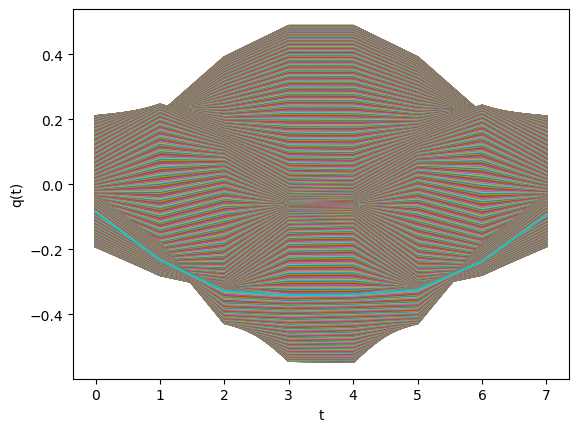

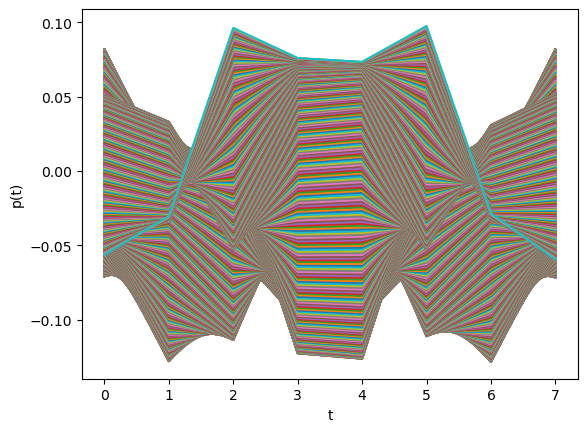

<Figure size 640x480 with 0 Axes>

In [66]:
## Using Euler Method to integrate qdot and pdot
a = 0.0 # start of the interval
b = 20.0 # end of the interval
N = 1000 # number of steps
dt = (b-a)/N # size of a single step

t_points = np.arange(a,b,h)
# q_points = np.zeros([M,N])
# p_points = np.zeros([M,N])

p_dot = p_dot_update(p_dot_0,q)

q_array = np.zeros([N,M])
p_array = np.zeros([N,M])

for t in range(1,N):
    for n in range(M):
        q[n] = q_dot[n]*dt + q[n]
        p[n] = p_dot[n]*dt + p[n]
        p_dot = p_dot_update(p_dot,q)
        q_dot = p
    q_array[t:]=q
    p_array[t:]=p

        

        

# for n in range(M):
#     q_n_dot = q_dot[n] # time derivative of q
#     p_n_dot = p_dot[n] # time derivative of p
#     for t in range(N):
#         if t == 0 or t == N-1:
#             q_points[n,t] = q[n]
#             p_points[n,t] = p[n]
#         else:
#             q_points[n,t] = q_n_dot*dt + q_points[n,t-1]
#             p_points[n,t] = p_n_dot*dt + p_points[n,t-1]

plt.plot(q_array.T)
plt.xlabel("t")
plt.ylabel("q(t)")
plt.figure()

plt.plot(p_array.T)
plt.xlabel("t")
plt.ylabel("p(t)")
plt.figure()

[[0.29788685 0.95489239 0.64282369]
 [0.28304997 0.93655254 0.10944492]]
